# Обучение без учителя в Scikit-learn

Ранее мы познакомились с понятием обучения с учителем. В тех задачах у нас имелись какие-то данные, а также набор правильных ответов на этих данных. Тогда нашей задачей было научиться предсказывать аналогичный ответ на данных, которые мы раньше не видели.

В отличие от обучения с учителем, в задачах обучения без учителя эти правильные ответы отсутствуют. В таком случае нам уже не нужно предсказывать какую-то величину, а лишь понять, как связаны между собой объекты из нашей выборки.

---
## Кластеризация

<ol>
    <li>Обучение без учителя</li>
    <li>Применение кластеризации</li>
    <li>Алгоритм k-means</li>
    <li>Агломеративная (иерархическая) кластеризация</li>
</ol>
    
Время: 00:25 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

**Кластеризация k-means**

Алгоритм вероятностного подхода

[Алгоритмы кластеризации](https://scikit-learn.org/stable/modules/clustering.html)

In [2]:
from sklearn.cluster import KMeans

In [3]:
model = KMeans(n_clusters=3, random_state=100)

In [4]:
def make_data(n, seed):
    np.random.seed(seed)
    shift_matrix = np.array([[3,3],[6,9],[9,3]])
    data = np.random.randn(3,2,n) + shift_matrix.reshape((3,2,1))
    data = np.swapaxes(data,1,2)
    data = data.reshape((-1,2))
    data *=np.array([[20,0.5]])
    df = pd.DataFrame({'x':data[:,0], 'y':data[:,1]},columns=['x','y'])
    df = df.sample(frac=1)
    return df

In [5]:
train = make_data(10,42)
test = make_data(10, 27)

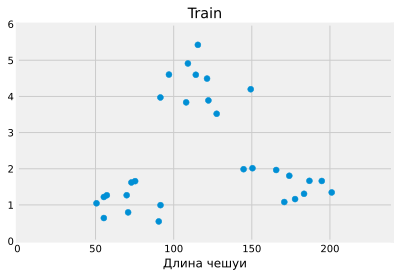

In [6]:
plt.scatter(train['x'], train['y'])
plt.xlim(0,240)
plt.ylim(0,6)
plt.xlabel('Длина тела')
plt.xlabel('Длина чешуи')
plt.title('Train')
pass

Нормализация данных

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
scaler = MinMaxScaler()

In [9]:
train_scaled = scaler.fit_transform(train)
train_scaled = pd.DataFrame(train_scaled, columns=['x','y'])

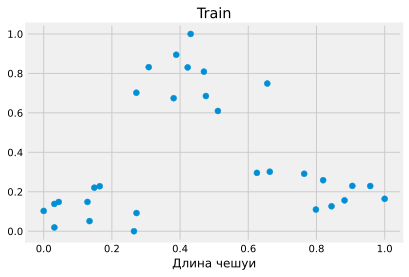

In [10]:
plt.scatter(train_scaled['x'], train_scaled['y'])
plt.xlabel('Длина тела')
plt.xlabel('Длина чешуи')
plt.title('Train')
pass

Посмтроение модели кластеризации

In [11]:
train_labels = model.fit_predict(train_scaled)

In [12]:
train_labels

array([2, 2, 1, 1, 1, 2, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0, 2, 2, 1, 0,
       1, 1, 2, 2, 2, 0, 1, 1])

**Центры кластеров**

In [13]:
model.cluster_centers_

array([[0.4314873 , 0.77857028],
       [0.12190576, 0.11495728],
       [0.82595794, 0.21634417]])

In [14]:
centers = scaler.inverse_transform(model.cluster_centers_)
centers

array([[115.56312871,   4.34494667],
       [ 68.96122223,   1.10467088],
       [174.94355655,   1.59972071]])

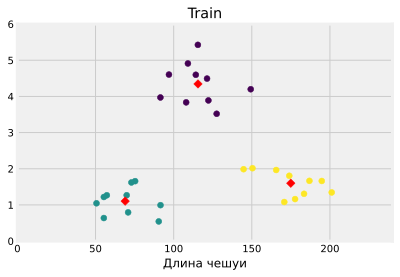

In [15]:
plt.scatter(train['x'], train['y'], c=train_labels)
plt.scatter(centers[:, 0], centers[:, 1], marker='D', c='red')
plt.xlim(0,240)
plt.ylim(0,6)
plt.xlabel('Длина тела')
plt.xlabel('Длина чешуи')
plt.title('Train')
pass

**Inertia**

Величина, показывающая, насколько далеко в среднем расположены точки от центров своих кластеров (сумма квадратов расстояний от О до Ц)

Если 0, то количество объектов = количество кластеров

In [16]:
model.inertia_

0.5417377477488049

In [17]:
ineria_arr=[]
for i in range(2,10):
    temp_model = KMeans(n_clusters=i, random_state=100)
    temp_model.fit(train_scaled)
    temp_inertia = temp_model.inertia_
    print(temp_inertia)
    ineria_arr.append(temp_inertia)

2.9002641632095463
0.5417377477488049
0.4281736891174851
0.3258659915567972
0.26736166193637667
0.2072579445597765
0.16774172223409062
0.1467127247607685


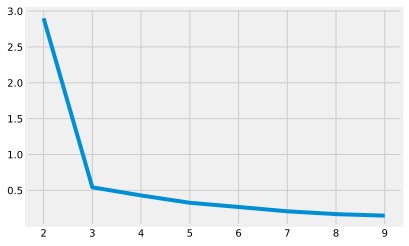

In [18]:
plt.plot([i for i in range(2,10)], ineria_arr)

Это был метод локтя. Резко инерция падает, лучше всего n = 3

**Agglomerative Clustering**

In [19]:
from sklearn.cluster import AgglomerativeClustering

In [20]:
model = AgglomerativeClustering(n_clusters=3)

In [21]:
train_labels = model.fit_predict(train_scaled)

In [22]:
train_labels

array([0, 0, 1, 1, 1, 0, 2, 0, 2, 1, 1, 2, 2, 2, 2, 2, 0, 2, 0, 0, 1, 2,
       1, 1, 0, 0, 0, 2, 1, 1], dtype=int64)

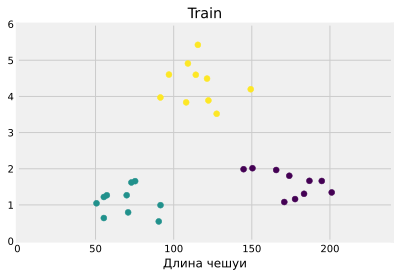

In [23]:
plt.scatter(train['x'], train['y'], c=train_labels)
plt.xlim(0,240)
plt.ylim(0,6)
plt.xlabel('Длина тела')
plt.xlabel('Длина чешуи')
plt.title('Train')
pass

**Важно!**<br>
В агломеративном методе нет метода предикт. Однако на тренировочных данных мы получили правильный результат. То есть по факту у нас есть признаки(`train_scaled`) и результат(`train_labels`) для тренировочной выборки.

Благодаря этому мы можем теперь создать модель обучения с учителем, например, KNN:

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
knn = KNeighborsClassifier(n_neighbors=5)

In [26]:
knn.fit(train_scaled, train_labels)

KNeighborsClassifier()

In [27]:
test_scaled = scaler.transform(test)
test_scaled = pd.DataFrame(test_scaled, columns=['x','y'])

In [28]:
test_labels = knn.predict(test_scaled)

In [29]:
test_labels

array([1, 0, 1, 0, 2, 2, 2, 2, 2, 1, 1, 0, 0, 1, 1, 0, 0, 1, 2, 2, 0, 1,
       0, 0, 1, 2, 2, 1, 2, 0], dtype=int64)

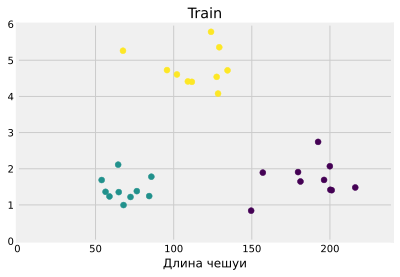

In [30]:
plt.scatter(test['x'], test['y'], c=test_labels)
plt.xlim(0,240)
plt.ylim(0,6)
plt.xlabel('Длина тела')
plt.xlabel('Длина чешуи')
plt.title('Train')
pass

Как видим модель отлично реализована!

---
## Понижение размерности данных

<ol>
    <li>Цели понижения размерности данных</li>
    <li>Метод главных компонент (Principal component analysis или PCA)</li>
    <li>Применение метода главных компонент в моделях машинного обучения</li>
</ol>
    
Время: 09:35

Разряженные данные - например, данные, которые получаются с помощью get_dummies

=> методы понижения размерности

Данные также должны быть отмасштабируемы!

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

**PCA**<br>
Principal Component Analysis

In [32]:
# количество комнат/площадь дома в тысячах футов
houses = np.array([[5, 1.6],[4,1.4],[6,1.9],[3,1.1],[4,1.25]])

Text(0, 0.5, 'Площадь дома')

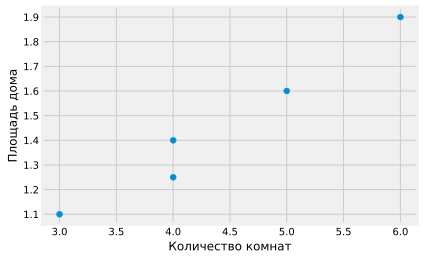

In [33]:
plt.scatter(houses[:,0],houses[:,1])
plt.xlabel('Количество комнат')
plt.ylabel('Площадь дома')

Если данные коррелируют, то их можно объеденить с помощью метода понижения размерности

**Алгоритм PCA**

In [34]:
houses

array([[5.  , 1.6 ],
       [4.  , 1.4 ],
       [6.  , 1.9 ],
       [3.  , 1.1 ],
       [4.  , 1.25]])

Признаки не отличаются друг от друга на более чем в 10 раз, значит можно обойтись без масштабирования!

In [35]:
mean_values = np.mean(houses, axis = 0)
mean_values

array([4.4 , 1.45])

In [36]:
houses_centered = houses - mean_values
houses_centered

array([[ 0.6 ,  0.15],
       [-0.4 , -0.05],
       [ 1.6 ,  0.45],
       [-1.4 , -0.35],
       [-0.4 , -0.2 ]])

Матрица ковариаций:

In [37]:
covarience_matrix = np.cov(houses_centered.T)
covarience_matrix

array([[1.3   , 0.35  ],
       [0.35  , 0.0975]])

Собственные значения и собственные векторы

In [38]:
eigenvalues, eigenvectors = np.linalg.eig(covarience_matrix)

In [39]:
eigenvalues

array([1.39445221, 0.00304779])

In [40]:
eigenvectors

array([[ 0.96546225, -0.26054298],
       [ 0.26054298,  0.96546225]])

Берем собственное значение из 0 индекса и его вектора. 

Так как одна главная компонента, то выбираем одно собственное значение

Умножим центрированные данные на этот вектор:

In [41]:
result_pre = np.dot(houses_centered, eigenvectors[:, 0])
result = result_pre.reshape(-1,1)
result

array([[ 0.6183588 ],
       [-0.39921205],
       [ 1.66198394],
       [-1.44283719],
       [-0.4382935 ]])

было 2 столбца признаков, а стал 1.
Мы сделали вручную, а теперь посмотрим как бы было, если бы мы просто воспользовались библиотекой PCA

In [42]:
from sklearn.decomposition import PCA

In [43]:
pca = PCA(n_components=1)

In [44]:
mc = pca.fit_transform(houses)
mc

array([[ 0.6183588 ],
       [-0.39921205],
       [ 1.66198394],
       [-1.44283719],
       [-0.4382935 ]])

In [45]:
pca.explained_variance_ratio_

array([0.99781911])

коэффициент почти равен 1, это означает что мы почти не потеряли данные

**Применение PCA в моделях машинного обучения**

Титаник 

In [46]:
X_train = pd.read_pickle('X_train.pkl')
y_train = pd.read_pickle('y_train.pkl')

X_valid = pd.read_pickle('X_valid.pkl')
y_valid = pd.read_pickle('y_valid.pkl')

In [47]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 299 to 103
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         668 non-null    float64
 1   SibSp       668 non-null    int64  
 2   Parch       668 non-null    int64  
 3   Fare        668 non-null    float64
 4   Sex_female  668 non-null    uint8  
 5   Sex_male    668 non-null    uint8  
 6   Embarked_C  668 non-null    uint8  
 7   Embarked_Q  668 non-null    uint8  
 8   Embarked_S  668 non-null    uint8  
 9   Pclass_1    668 non-null    uint8  
 10  Pclass_2    668 non-null    uint8  
 11  Pclass_3    668 non-null    uint8  
dtypes: float64(2), int64(2), uint8(8)
memory usage: 31.3 KB


PCA требует масштабирования!

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
# PCA делает центрирование, а значит в scaler можно отключить центрирование, дабы избежать лишних вычислений.
scaler = StandardScaler(with_mean = False)

In [50]:
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_valid_scaled = pd.DataFrame(X_valid_scaled, columns=X_train.columns)

*Не указываем количество компонент*

In [51]:
pca = PCA(random_state=100)

In [52]:
pca.fit(X_train_scaled)

PCA(random_state=100)

In [53]:
pca.explained_variance_ratio_

array([2.18834543e-01, 1.76026329e-01, 1.65241118e-01, 1.23320327e-01,
       9.92614660e-02, 8.18080067e-02, 5.79253274e-02, 4.44208748e-02,
       3.31620074e-02, 1.70809753e-32, 8.80068331e-33, 6.46442831e-33])

In [54]:
np.sum(pca.explained_variance_ratio_[:])

0.9999999999999999

Оставили только 7 главных компонент:

In [55]:
np.sum(pca.explained_variance_ratio_[:7])

0.9224171178002111

In [56]:
pca = PCA(n_components=7, random_state=100)

In [57]:
X_train_mc = pca.fit_transform(X_train_scaled)

In [58]:
X_valid_mc = pca.transform(X_valid_scaled)

Построим (обучим) модель логистической регрессии по главным признакам, по выборке X_train_mc и X_valid_mc

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [60]:
lr = LogisticRegression()

In [61]:
lr.fit(X_train_mc, y_train)

LogisticRegression()

In [62]:
y_pred = lr.predict(X_valid_mc)

In [63]:
accuracy_score(y_valid, y_pred)

0.8026905829596412

Получилось на ~1% ниже чем мы делали в предыдущем уроке.

---
## Алгоритм tSNE

Алгоритм _t-SNE_ (_t-distributed Stochastic Neighbor Embedding_ или _Стохастическое вложение соседей с t-распределением_)

ТиСНИ. С помозью t-SNE можно снижать размерность данных, что позволяет визуализировать многомерные данные в 2D или 3D графике. 
Если объекты в выборке имеют большое количество признаков, то можно получить представление о них, преобразовав данные с помощью алгоритма t-SNE.

В частности, можно увидеть возможность разделения обхектов на кластеры, определить подходящее их число, а также получить представление о качестве разбиения на кластеры. 

<ol>
    <li>Применение алгоритма t-SNE</li>
    <li>Визуализация и анализ данных с пониженной размерностью</li>
    <li>Использование информации, полученной с помощью t-SNE, в моделях</li>
</ol>
    
Время: 18:05

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [65]:
from sklearn.manifold import TSNE

In [66]:
from sklearn.datasets import load_boston

In [67]:
boston = load_boston()

In [68]:
for line in boston.DESCR.split('\n'):
    print(line)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [69]:
data = boston.data

In [70]:
feature_names = boston.feature_names

In [71]:
X = pd.DataFrame(data, columns=feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [72]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [73]:
price = boston.target

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, price, test_size=0.3, random_state=7)

In [75]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((354, 13), (152, 13), (354,), (152,))

Важно чтобы все признаки имели схожий масштаб

In [76]:
from sklearn.preprocessing import StandardScaler

In [77]:
scaler = StandardScaler()

In [78]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

Применение t-SNE

learning_rate - плотность точек, рекомендовано от 10 до 1000

In [79]:
tsne = TSNE(n_components=2, learning_rate=150, random_state=100)

In [80]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

In [81]:
X_train_tsne

array([[ 1.97306767e+01, -1.94626217e+01],
       [ 1.21997356e+01,  4.55679685e-01],
       [ 2.79763107e+01, -2.31479168e+01],
       [ 2.82301903e+01, -2.44654903e+01],
       [ 2.38460693e+01, -1.71478729e+01],
       [-1.72620571e+00, -1.22397213e+01],
       [-3.47646618e+00, -1.07678719e+01],
       [-1.11658220e+01,  5.70147228e+00],
       [-1.52042179e+01,  1.49383354e+01],
       [ 2.71438313e+01, -1.37679443e+01],
       [-1.20941334e+01,  1.30416002e+01],
       [ 1.83208675e+01, -1.90984097e+01],
       [-2.58563066e+00,  4.81087399e+00],
       [-1.39892826e+01,  1.72273140e+01],
       [ 2.88109398e+01, -2.24357510e+01],
       [-1.74500217e+01,  1.83598404e+01],
       [-8.92891026e+00,  1.89253163e+00],
       [ 2.82703533e+01, -2.14444752e+01],
       [-1.51507416e+01,  1.34391785e+01],
       [ 2.08362331e+01, -1.52325583e+01],
       [ 9.81539154e+00,  4.43877816e-01],
       [-5.93669987e+00, -2.32771444e+00],
       [-1.33501492e+01,  1.51200075e+01],
       [-1.

In [82]:
X_train_tsne.shape

(354, 2)

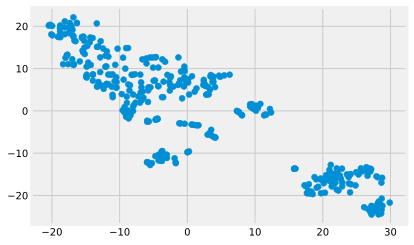

In [83]:
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1])
pass

Разобьем на 2 кластера

In [84]:
from sklearn.cluster import KMeans

In [85]:
kmeans = KMeans(n_clusters=2)

In [86]:
labels_train = kmeans.fit_predict(X_train_scaled)
# labels_train = kmeans.fit_predict(X_train_tsne)

In [87]:
pd.value_counts(labels_train)

0    232
1    122
dtype: int64

In [88]:
labels_test = kmeans.predict(X_test_scaled)

In [89]:
pd.value_counts(labels_test)

0    97
1    55
dtype: int64

График t-SNE с известными лейблами

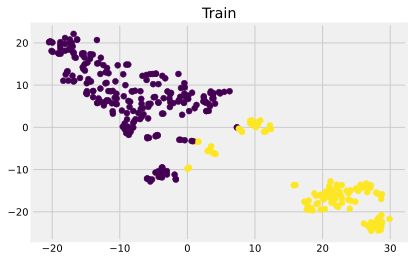

In [90]:
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1], c=labels_train)
plt.title('Train')
pass

Посмотрим данные, расположенные в разных кластерах

In [91]:
y_train.mean()

22.595762711864406

In [92]:
y_train[labels_train == 0].mean()

25.94439655172414

In [93]:
y_train[labels_train == 1].mean()

16.227868852459018

**ВАЖНО!**

Вывод простой: t-SNE трансформировало наши данные (X_train_scaled) на 2 кластера (см. график). А с помощью KMeans мы получили значения кластеров. Затем просто визуализировали.

**использование информации полученной с помощью t-SNE в моделях**

Обучяем для каждого кластера по одной модели:

In [94]:
from sklearn.linear_model import LogisticRegression

In [95]:
lr = LogisticRegression()

1-ая

In [97]:
lr.fit(X_train_scaled, y_train)

ValueError: Unknown label type: 'continuous'

In [98]:
X_test_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     152 non-null    float64
 1   ZN       152 non-null    float64
 2   INDUS    152 non-null    float64
 3   CHAS     152 non-null    float64
 4   NOX      152 non-null    float64
 5   RM       152 non-null    float64
 6   AGE      152 non-null    float64
 7   DIS      152 non-null    float64
 8   RAD      152 non-null    float64
 9   TAX      152 non-null    float64
 10  PTRATIO  152 non-null    float64
 11  B        152 non-null    float64
 12  LSTAT    152 non-null    float64
dtypes: float64(13)
memory usage: 15.6 KB
